In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter

In [ ]:
df = pd.read_csv('/content/full_dataset_with_alternate_indexing.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'hub_id', 'complete_time', 'test_wand_type',
       'biomarker', 'con_value', 'group', 'cycle_day', 'cycle_index',
       'cycle_length', 'cycle_status', 'cycle_day_bw', 'max_LH_day',
       'max_LH_day_bw', 'cycle_day_from_LH_spike'],
      dtype='object')

In [ ]:
df['group'].value_counts()

,count
group,
PCOS,410055
nonPCOS-nonBaseline,399295
Baseline,158279


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,id,hub_id,complete_time,test_wand_type,biomarker,con_value,group,cycle_day,cycle_index,cycle_length,cycle_status,cycle_day_bw,max_LH_day,max_LH_day_bw,cycle_day_from_LH_spike
0,584470,U2921516,2021-11-05 21:46:10,9,9,15.01,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0
1,584471,U2921516,2021-11-05 22:03:05,3,1,1.99,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0
2,584472,U2921516,2021-11-05 22:03:05,3,3,111.12,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0
3,584473,U2921516,2021-11-06 21:38:41,3,1,3.33,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0
4,584474,U2921516,2021-11-06 21:38:41,3,3,207.98,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0


In [ ]:
# lh 1, pdg 9, e3g 3
def biomarker(val):
    if val == 1:
      return 'LH'
    elif val == 9:
      return 'PDG'
    elif val == 3:
      return 'E3G'
    elif val == 16:
      return 'FSH'
    elif val == 14:
      return 'HCG Qualitative'
    elif val == 2:
      return "HCG"
    else:
      return np.NaN

In [ ]:
df['hormone'] = df['biomarker'].apply(biomarker)

In [ ]:
df = df[df['group'] != 'nonPCOS-nonBaseline']

In [ ]:
E3G = df[df['hormone'] == 'E3G']
PDG = df[df['hormone'] == 'PDG']
LH = df[df['hormone'] == 'LH']

In [ ]:
df['cycle_day'] = df['cycle_day'].astype(int)

In [ ]:
df['cycle_day']

,cycle_day
0,28
1,28
2,28
3,29
4,29
...,...
967624,30
967625,30
967626,30
967627,16


Text(0, 0.5, 'Level')

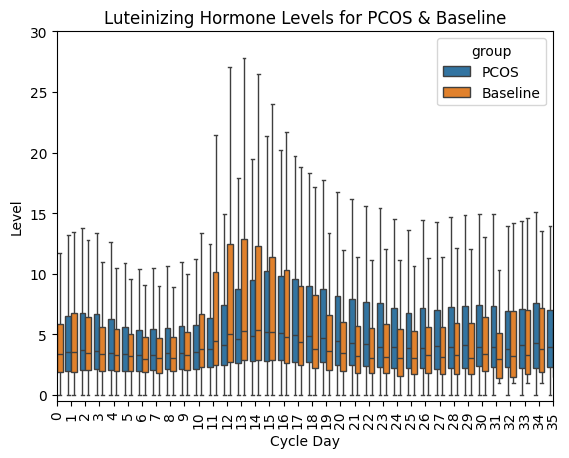

In [49]:
sns.boxplot(data=LH, x='cycle_day',y='con_value',hue='group',showfliers=False)
plt.xlim(0,35)
plt.xticks(rotation=90)
plt.ylim(-0.5,30)
plt.title("Luteinizing Hormone Levels for PCOS & Baseline")
plt.xlabel("Cycle Day")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylabel("Level")

Text(0, 0.5, 'Level')

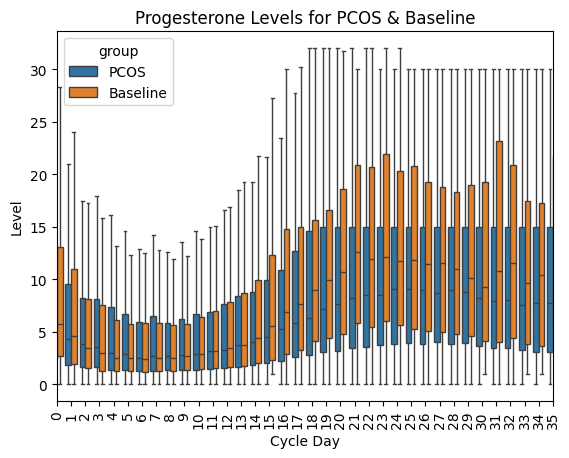

In [51]:
sns.boxplot(data=PDG, x='cycle_day',y='con_value',hue='group',showfliers=False)
plt.xlim(0,35)
plt.xticks(rotation=90)
#plt.ylim(-0.5,100)
plt.title("Progesterone Levels for PCOS & Baseline")
plt.xlabel("Cycle Day")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylabel("Level")

Text(0, 0.5, 'Level')

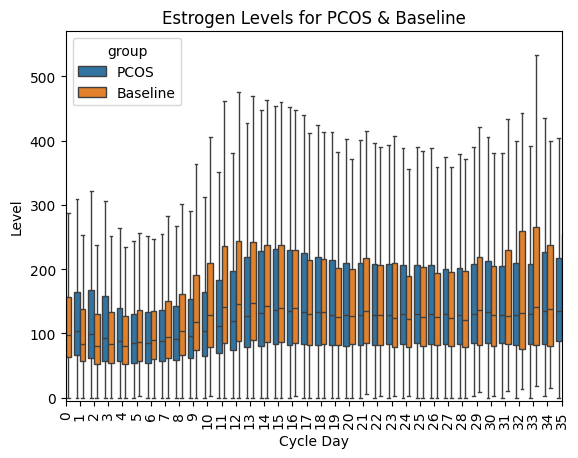

In [54]:
sns.boxplot(data=E3G, x='cycle_day',y='con_value',hue='group',showfliers=False)
plt.xlim(0,35)
plt.xticks(rotation=90)
plt.ylim(-5,570)
plt.title("Estrogen Levels for PCOS & Baseline")
plt.xlabel("Cycle Day")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylabel("Level")